# Outils de base pour la modélisation statistique en Python

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl

## Simulation numérique - random/numpy/matplotlib

In [17]:
import random

**Simulation de la planche de Galton** montrant la convergence d'une Loi Binomiale (n, 0.5) vers une loi normmale (thm de Moivre Laplace)

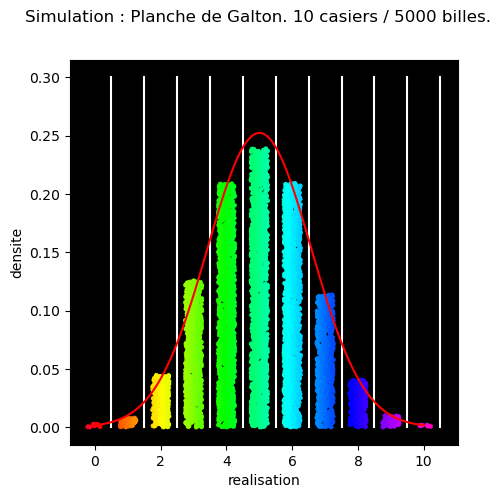

In [18]:
# Simulation de la planche de Galton :
def drawGalton(n, N_billes):
    bars = np.linspace(0.5, n+0.5, n+1)

    frequency = np.zeros((n,))
    X = []
    Y = []

    for k in range(N_billes):
        _sum = 0
        for pile_face in range(n):
            _sum += random.randint(0, 1)
        X.append(_sum + (0.5*random.random() - 0.25))
        frequency[_sum-1] += 1
        Y.append(frequency[_sum-1]/N_billes)

    fig, axs = plt.subplots(1, 1, figsize=(5,5))
    fig.suptitle(f"Simulation : Planche de Galton. {n} casiers / {N_billes} billes.", size=(12))
    axs.set_facecolor('black')
    axs.set_xlabel("realisation")
    axs.set_ylabel("densite")


    for i in range(len(bars)):
        axs.plot([bars[i], bars[i]], [0.0, 0.3], c='white')
    axs.scatter(X, Y, linewidth=0.5, marker='.', c=np.array(X)/n, cmap='gist_rainbow')

    xx = np.linspace(0, n, 10*n)
    mu = n*0.5
    var = n*0.5**2
    f = lambda x : np.exp(-((x - mu)**2)/(2*var))/(np.sqrt(2*np.pi*(var)))
    axs.plot(xx, f(xx), c='red')
        
drawGalton(10, 5000)

## Manipulation des données avec Pandas

Utilisation du jeu de données Iris

In [19]:
from sklearn import datasets

X, y = datasets.load_iris(return_X_y = True)

**Charger un dataframe**

In [20]:
Xdf = pd.DataFrame(X)
Xdf

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
ydf = pd.DataFrame(y)
ydf

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


**Renommer les features**

In [22]:
Xdf.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Xdf

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
ydf.columns = ['type']
ydf

,type
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


**Remplacer les valeurs d'une colonne**

In [24]:
ydf = ydf.replace(
    {0: 'Iris_setosa',
     1: 'Iris_versicolor',
     2: 'Iris_virginica'}
)
ydf

,type
0,Iris_setosa
1,Iris_setosa
2,Iris_setosa
3,Iris_setosa
4,Iris_setosa
...,...
145,Iris_virginica
146,Iris_virginica
147,Iris_virginica
148,Iris_virginica


**Concatenation**

In [25]:
Xy = pd.concat([Xdf, ydf], axis=1)
Xy

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris_setosa
1,4.9,3.0,1.4,0.2,Iris_setosa
2,4.7,3.2,1.3,0.2,Iris_setosa
3,4.6,3.1,1.5,0.2,Iris_setosa
4,5.0,3.6,1.4,0.2,Iris_setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris_virginica
146,6.3,2.5,5.0,1.9,Iris_virginica
147,6.5,3.0,5.2,2.0,Iris_virginica
148,6.2,3.4,5.4,2.3,Iris_virginica


**Charger un fichier depuis un csv ou autre fichier de données**

In [26]:
df = pd.read_csv("../../Datasets/Iris/Iris.data")

In [27]:
df

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
#colonnes
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type'], dtype='object')

**Regrouper selon une valeur qualitative**

In [29]:
#moyenne estimée par catégorie (moyenne empirique)
df.groupby('type').mean()

,sepal_length,sepal_width,petal_length,petal_width
type,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [30]:
#recalcul à la main de la variance de sepal_length:
echant = df.loc[df['type']=='Iris-setosa']['sepal_length']
mean = echant.sum()/len(echant) #moyenne empirique/esperance
var = ((echant - mean)**2).sum() / (len(echant) - 1) #estimation non biaisé de la variance

print("Calcul manuel :")
print(f"    Moyenne estimée sepal_length des Iris-setosa : {mean}")
print(f"    Variance estimée (non biaisé) sepal_length des Iris-setosa : {var:6f}\n")

print("Calcul par le module pandas :")
#variance estimée par catégorie (utilisation de l'estimateur non-biaisé par défaut)
df.groupby('type').var()

Calcul manuel :
    Moyenne estimée sepal_length des Iris-setosa : 5.006
    Variance estimée (non biaisé) sepal_length des Iris-setosa : 0.124249

Calcul par le module pandas :


,sepal_length,sepal_width,petal_length,petal_width
type,,,,
Iris-setosa,0.124249,0.145180,0.030106,0.011494
Iris-versicolor,0.266433,0.098469,0.220816,0.039106
Iris-virginica,0.404343,0.104004,0.304588,0.075433


**Extraire une partie selon des conditions**

In [31]:
# les iris-setosa dont la longueur du sepale est supérieur à la moyenne estimée précédemment
sub_df = df.loc[df['sepal_length'] > 5.006].loc[df['type']=='Iris-setosa']
sub_df

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
17,5.1,3.5,1.4,0.3,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa


## Visualisation statistique avec Seaborn

### Nuages de points

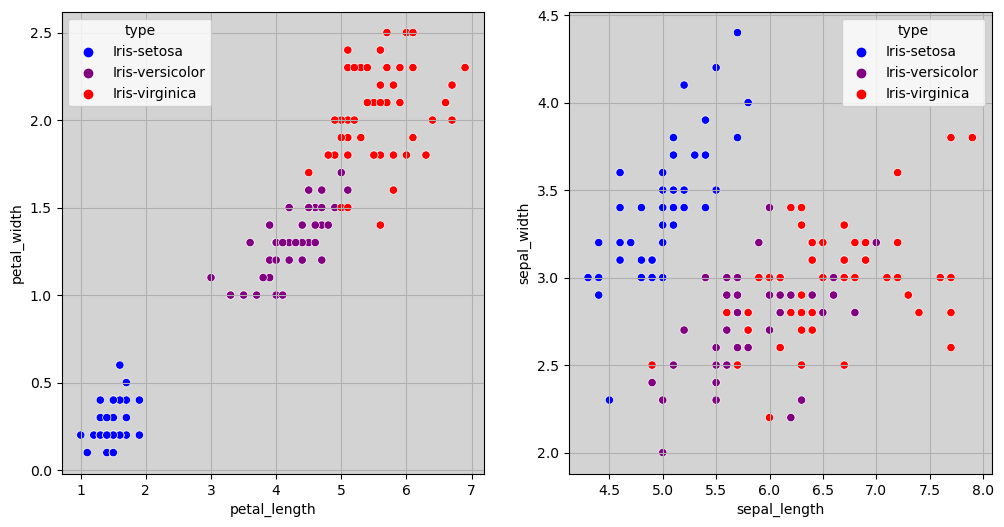

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

color_palette = ('blue', 'purple', 'red')

sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='type', palette=color_palette, ax=axs[0])
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='type', palette=color_palette, ax=axs[1])

axs[0].set_facecolor('lightgray')
axs[0].grid()

axs[1].set_facecolor('lightgray')
axs[1].grid()

La corrélation est forte sur la dimension des pétales... beaucoup moins sur la dimension des sépales

### Histogramme

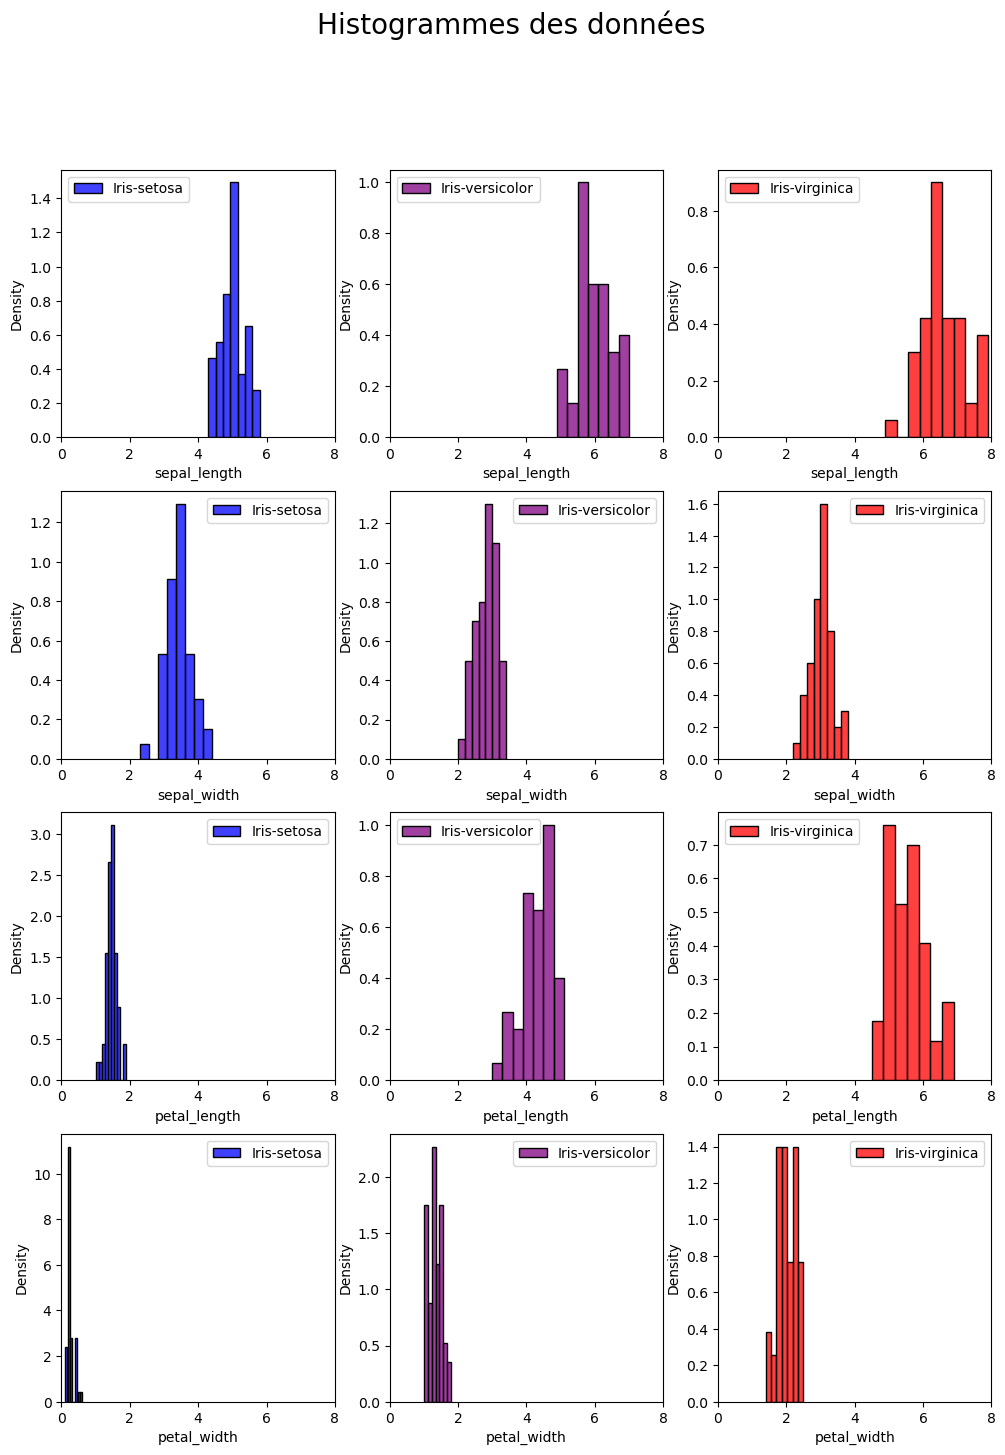

In [33]:
fig, axs = plt.subplots(4, 3, figsize=(12, 16))
fig.suptitle("Histogrammes des données", size=20)

labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
types = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i, lbl in enumerate(labels):
    for j, t in enumerate(types):
        sns.histplot(data=df.loc[df['type'] == t], x=lbl, ax=axs[i][j], stat='density', label=t, color=(j/2, 0, 1-j/2))
        axs[i][j].set_xlim(0, 8)
        axs[i][j].legend()

### Matrice de variance/covariance 

**Mesure de l'indépendance entre deux features par estimation sur le jeu de données**

Rappel : $Cov(X, Y) = E[(X - E[X])(Y-E[Y])] = E[XY] - E[X]E[Y] = 0$ si X et Y sont indépendantes.
Matrice de covariance du vecteur $(X_1, ..., X_n)$ = la covariance des $Xi, Xj$ pour $i \neq j$ et la variance estimée des $Xi$ sur la diagonale 


Calcul à la main : 
     Covariance sepal_width/petal_width estimée : -0.31956799999999996

Matrice de variance/covariance avec seaborn : 


<Axes: >

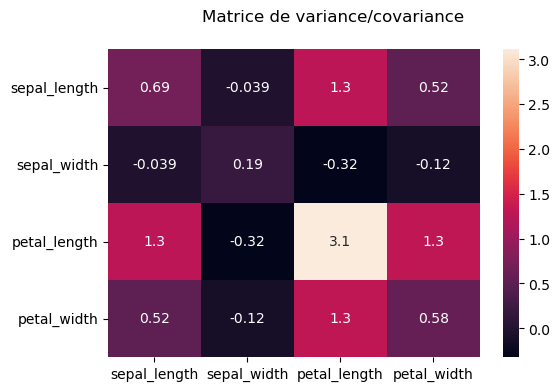

In [34]:
#calcul d'un des coefficients de l'un des coefficients de covariance : 
print("Calcul à la main : ")
mean_sw = df['sepal_width'].mean()
mean_pl = df['petal_length'].mean()
cov_sw_pl = ((df['sepal_width'] - mean_sw) * (df['petal_length'] - mean_pl)).sum() / len(df)
print(f"     Covariance sepal_width/petal_width estimée : {cov_sw_pl}\n")


# Utilisation de seaborn :
print("Matrice de variance/covariance avec seaborn : ")
fig, ax0 = plt.subplots(1, 1, figsize=(6, 4))
fig.suptitle('Matrice de variance/covariance')
cov = df.drop('type', axis=1).cov()
corr = df.drop('type', axis=1).corr()
sns.heatmap(cov, annot=True, ax=ax0)


### Matrice de corrélation

**Normalisation de la matrice de variance/covariance** en divisant par les écarts-types estimés des variables concernées

Calcul à la main :
     Correlation estimée sepal_width/petal_length -0.4177126557584801

Matrice de variance/covariance avec seaborn : 


<Axes: >

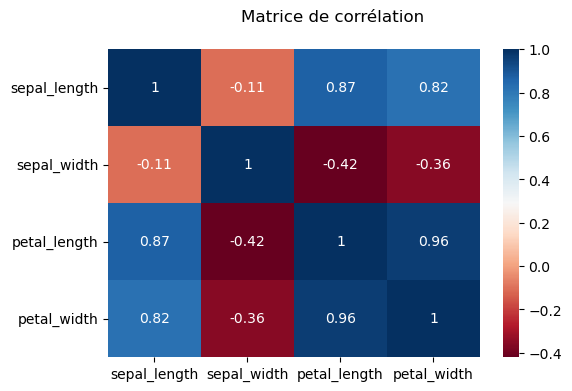

In [35]:
#A la main (reprenant le calcul de covariance précédent):
print("Calcul à la main :")
sd_sw = np.sqrt(((df['sepal_width'] - mean_sw)**2).sum() / (len(df) - 1))
sd_pl = np.sqrt(((df['petal_length'] - mean_pl)**2).sum() / (len(df) - 1))
print(f"     Correlation estimée sepal_width/petal_length {cov_sw_pl/(sd_sw*sd_pl)}\n")


# Utilisation de seaborn :
print("Matrice de variance/covariance avec seaborn : ")
fig, ax0 = plt.subplots(1, 1, figsize=(6, 4))
fig.suptitle('Matrice de corrélation')
corr = df.drop('type', axis=1).corr()
sns.heatmap(corr, cmap='RdBu', annot=True, ax=ax0)

### Boites à moustache

<Axes: >

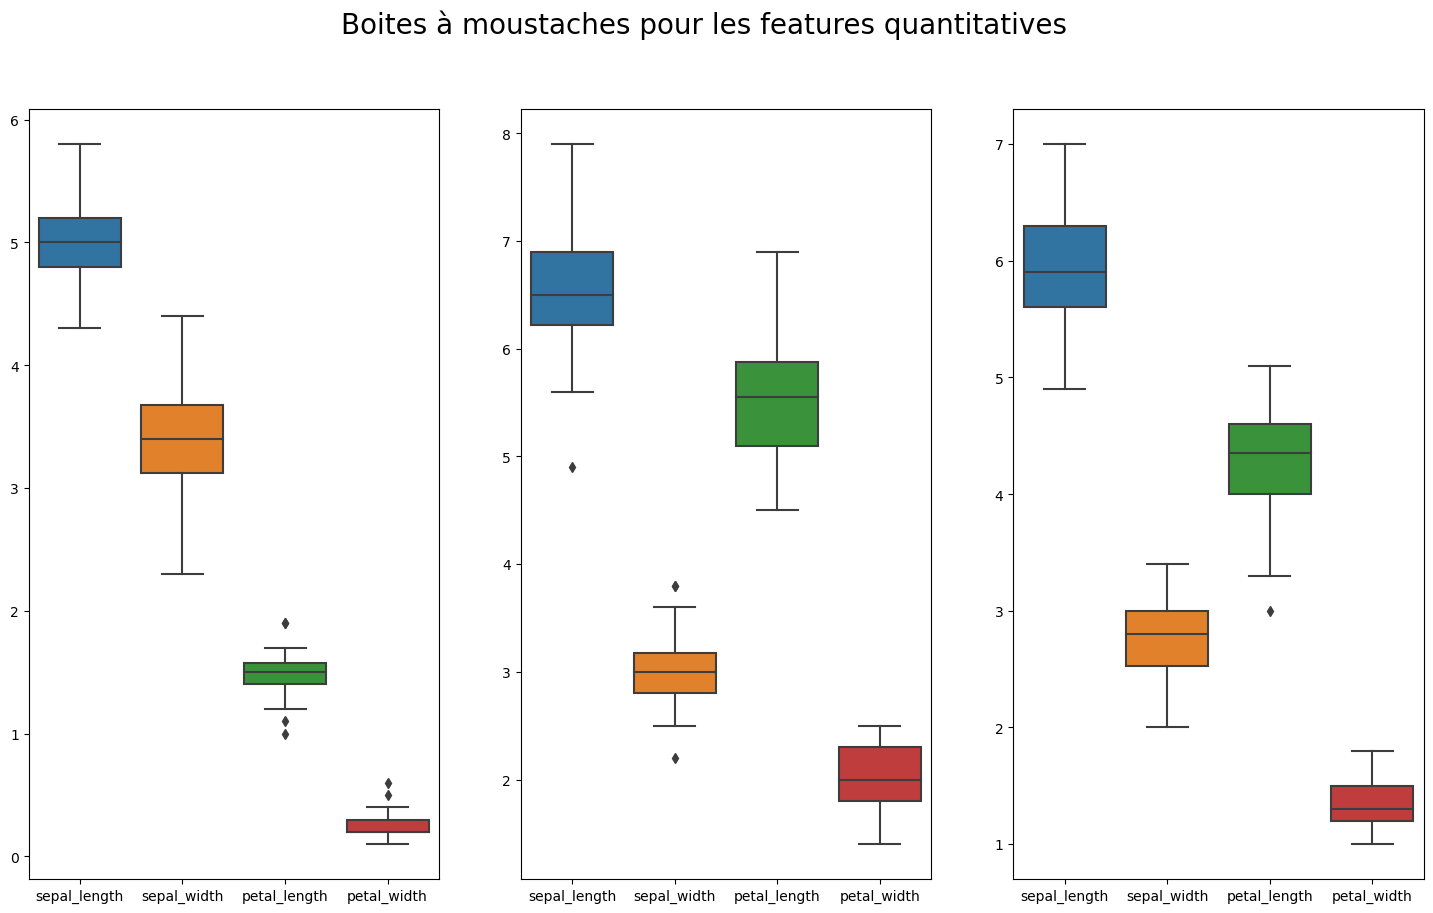

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle("Boites à moustaches pour les features quantitatives", size=20)

sns.boxplot(data=df.loc[df['type'] == 'Iris-setosa'], ax=axs[0])
sns.boxplot(data=df.loc[df['type'] == 'Iris-virginica'], ax=axs[1])
sns.boxplot(data=df.loc[df['type'] == 'Iris-versicolor'], ax=axs[2])

## Modélisation et tests statistiques :

On s'interesse à une approche de classification probabiliste, jouant sur le fait d'une correlation forte entre les classes d'Iris et la dimension des petales

### Modèle gaussien sur la longueur des pétales

In [37]:
import scipy.stats as st

On s'interesse à la longueur des pétales des trois échantillons de données formées par les trois sous-variétés d'Iris.

On suppose que la distribution des trois échantillons suivent une loi normale :
- $(X_1, ..., X_{50}) \sim N(m_1, s_1)$ loi des iris-setosa
- $(Y_1, ..., Y_{50}) \sim N(m_2, s_2)$ loi des iris-virginica
- $(Z_1, ..., Z_{50}) \sim N(m_3, s_3)$ loi des iris-versicolor

**0. Fonction quantile/quantile pour appuyer le choix de la modélisation**

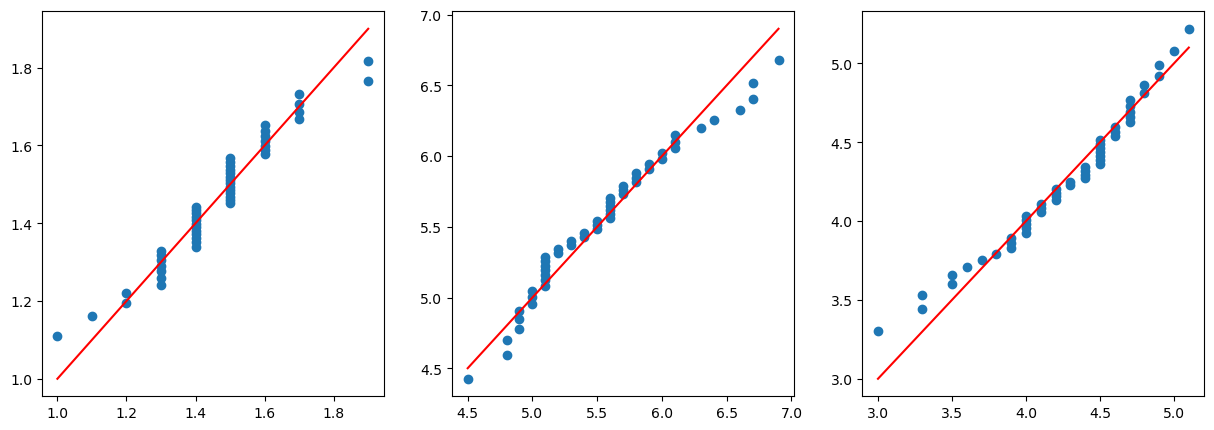

In [38]:
X = np.sort(df.loc[df['type']=='Iris-setosa']['petal_length'])
Y = np.sort(df.loc[df['type']=='Iris-virginica']['petal_length'])
Z = np.sort(df.loc[df['type']=='Iris-versicolor']['petal_length'])

VA = [X, Y, Z]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, va in enumerate(VA):
    axs[i].scatter(va, st.norm.ppf( np.linspace(1, len(va), len(va))/(len(va)+1), va.mean(), np.sqrt(va.var())))
    axs[i].plot([min(va), max(va)], [min(va), max(va)], c='r')

Les quantiles exacts de la loi normale sont globalement cohérents avec la croissance des réalisations de nos données. La modélisation est donc appropriée.

**1. Estimation des parametres des trois lois**

In [39]:
m1 = df.loc[df['type'] == 'Iris-setosa']['petal_length'].mean()
m2 = df.loc[df['type'] == 'Iris-virginica']['petal_length'].mean()
m3 = df.loc[df['type'] == 'Iris-versicolor']['petal_length'].mean()

In [40]:
print("Estimation des espérances :")
print(m1)
print(m2)
print(m3)

Estimation des espérances :
1.464
5.5520000000000005
4.26


In [41]:
s1 = df.loc[df['type'] == 'Iris-setosa']['petal_length'].var()
s2 = df.loc[df['type'] == 'Iris-virginica']['petal_length'].var()
s3 = df.loc[df['type'] == 'Iris-versicolor']['petal_length'].var()

In [42]:
print("Estimation des variances :")
print(s1)
print(s2)
print(s3)

Estimation des variances :
0.030106122448979603
0.304587755102041
0.22081632653061237


**2. Mesures d'intervalles de confiance pour la mesure des parametres**

Utilisation de la loi de student :

$\sqrt{n} \frac{X_E - \mu}{\sigma_E} \sim T(n-1)$

pour déterminer l'intervalle de confiance niveau 5% pour mu:

$ -q_{0.975} \leq  \sqrt{n} \frac{X_E - \mu}{\sigma_E} \leq q_{0.975}$

$ -\frac{\sigma_E}{\sqrt{n}} q_{0.975} \leq {X_E - \mu} \leq \frac{\sigma_E}{\sqrt{n}}  q_{0.975}$


In [58]:
def IC_mu_norm(alpha, mu_obs, s_obs, n):
    return mu_obs - np.array([1, -1]) * (np.sqrt(s_obs)/np.sqrt(n)) * st.t.ppf(1-alpha/2, n-1)

IC_mu_setosa = IC_mu_norm(0.05, m1, s1, 50)
IC_mu_virginica = IC_mu_norm(0.05, m2, s2, 50)
IC_mu_versicolor = IC_mu_norm(0.05, m3, s3, 50)

print(IC_mu_setosa)
print(IC_mu_versicolor)
print(IC_mu_virginica)

[1.41468867 1.51331133]
[4.12645278 4.39354722]
[5.39515326 5.70884674]


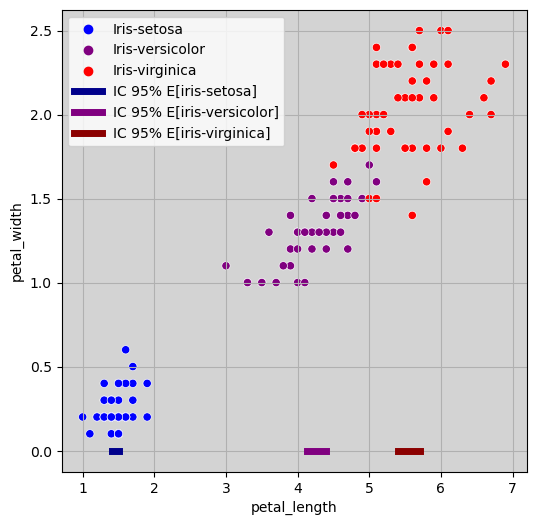

In [59]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6))

color_palette = ('blue', 'purple', 'red')

sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='type', palette=color_palette, ax=axs)

axs.set_facecolor('lightgray')
axs.plot(IC_mu_setosa, [0, 0], c='darkblue', linewidth=5, label='IC 95% E[iris-setosa]')
axs.plot(IC_mu_versicolor, [0, 0], c='purple', linewidth=5, label='IC 95% E[iris-versicolor]')
axs.plot(IC_mu_virginica, [0, 0], c='darkred', linewidth=5, label='IC 95% E[iris-virginica]')

axs.legend()
axs.grid()

### Modele gaussien sur la largeur des pétales

On s'interesse à la longueur des pétales des trois échantillons de données formées par les trois sous-variétés d'Iris.

On suppose que la distribution des trois échantillons suivent une loi normale :
- $(X_1, ..., X_{50}) \sim N(m_4, s_4)$ loi des iris-setosa
- $(Y_1, ..., Y_{50}) \sim N(m_5, s_5)$ loi des iris-virginica
- $(Z_1, ..., Z_{50}) \sim N(m_6, s_6)$ loi des iris-versicolor

On recherche de manière similaire l'intervalle de confiance et les parametres de loi 

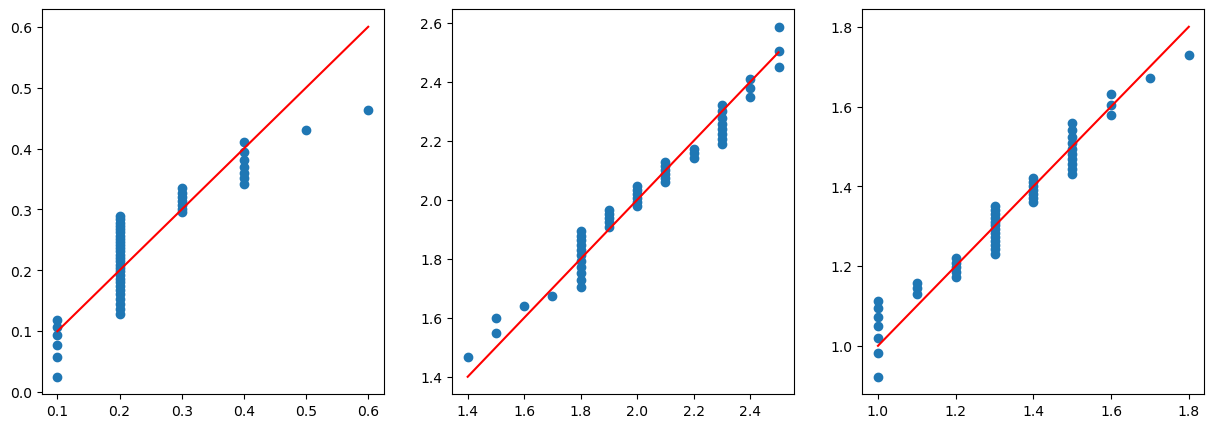

In [60]:
X = np.sort(df.loc[df['type']=='Iris-setosa']['petal_width'])
Y = np.sort(df.loc[df['type']=='Iris-virginica']['petal_width'])
Z = np.sort(df.loc[df['type']=='Iris-versicolor']['petal_width'])

VA = [X, Y, Z]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, va in enumerate(VA):
    axs[i].scatter(va, st.norm.ppf( np.linspace(1, len(va), len(va))/(len(va)+1), va.mean(), np.sqrt(va.var())))
    axs[i].plot([min(va), max(va)], [min(va), max(va)], c='r')

Le choix d'une modélisation gaussienne est plus discutable pour les iris-setosa... le manque de données ne permettant pas d'appuyer un autre modèle, on conserve ici un modèle gaussien.

In [61]:
m4 = df.loc[df['type'] == 'Iris-setosa']['petal_width'].mean()
m6 = df.loc[df['type'] == 'Iris-versicolor']['petal_width'].mean()
m5 = df.loc[df['type'] == 'Iris-virginica']['petal_width'].mean()

print(m4)
print(m5)
print(m6)

0.244
2.0260000000000002
1.3259999999999998


In [62]:
s4 = df.loc[df['type'] == 'Iris-setosa']['petal_width'].var()
s6 = df.loc[df['type'] == 'Iris-versicolor']['petal_width'].var()
s5 = df.loc[df['type'] == 'Iris-virginica']['petal_width'].var()

print(s4)
print(s5)
print(s6)

0.011493877551020404
0.07543265306122447
0.039106122448979576


In [63]:
IC_mu_setosa_pl = IC_mu_norm(.05, m4, s4, 50)
IC_mu_virginica_pl = IC_mu_norm(.05, m5, s5, 50)
IC_mu_versicolor_pl = IC_mu_norm(.05, m6, s6, 50)

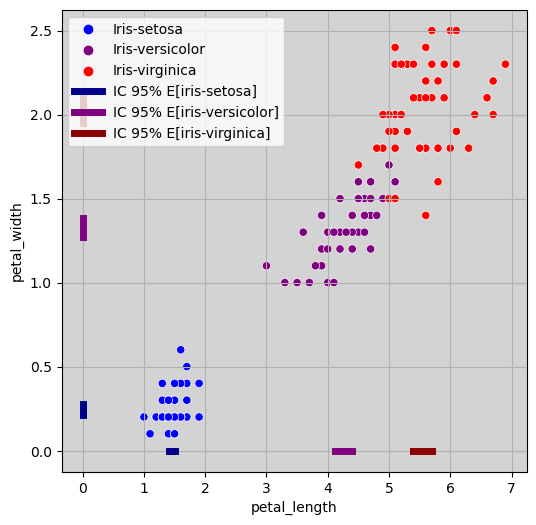

In [65]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6))

color_palette = ('blue', 'purple', 'red')

sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='type', palette=color_palette, ax=axs)

axs.set_facecolor('lightgray')
axs.plot(IC_mu_setosa, [0, 0], c='darkblue', linewidth=5, label='IC 95% E[iris-setosa]')
axs.plot(IC_mu_versicolor, [0, 0], c='purple', linewidth=5, label='IC 95% E[iris-versicolor]')
axs.plot(IC_mu_virginica, [0, 0], c='darkred', linewidth=5, label='IC 95% E[iris-virginica]')

axs.plot([0, 0], IC_mu_setosa_pl, c='darkblue', linewidth=5)
axs.plot([0, 0], IC_mu_versicolor_pl, c='purple', linewidth=5)
axs.plot([0, 0], IC_mu_virginica_pl, c='darkred', linewidth=5)

axs.legend()
axs.grid()


### Methode de Bonferroni

Croisement de deux intervalles de confiance à 97.5% pour obtenir un intervalle de confiance croisé de 95% :

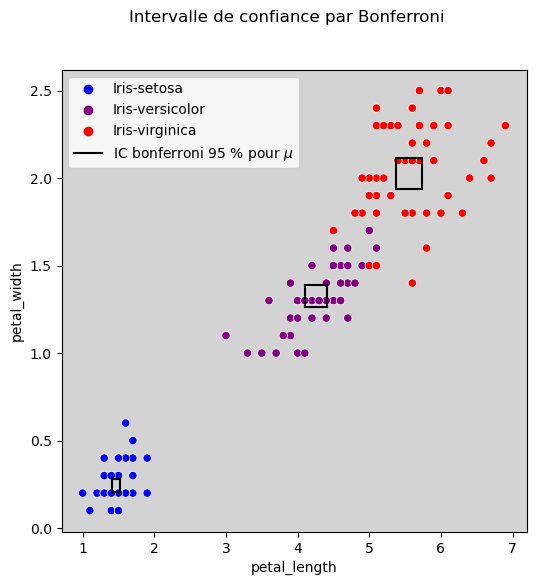

In [139]:
IC_setosa = (IC_mu_norm(0.025, m1, s1, 50), IC_mu_norm(0.025, m4, s4, 50))
IC_virginica = (IC_mu_norm(0.025, m2, s2, 50), IC_mu_norm(0.025, m5, s5, 50))
IC_versicolor = (IC_mu_norm(0.025, m3, s3, 50), IC_mu_norm(0.025, m6, s6, 50))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Intervalle de confiance par Bonferroni")
ax.set_facecolor('lightgray')

sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='type', palette=color_palette, ax=ax)
ax.plot(IC_setosa[0],[IC_setosa[1][0], IC_setosa[1][0]], c='black', label='IC bonferroni 95 % pour $\mu$')
ax.plot(IC_setosa[0],[IC_setosa[1][1], IC_setosa[1][1]], c='black')
ax.plot([IC_setosa[0][0], IC_setosa[0][0]],IC_setosa[1], c='black')
ax.plot([IC_setosa[0][1], IC_setosa[0][1]],IC_setosa[1], c='black')

ax.plot(IC_versicolor[0],[IC_versicolor[1][0], IC_versicolor[1][0]], c='black')
ax.plot(IC_versicolor[0],[IC_versicolor[1][1], IC_versicolor[1][1]], c='black')
ax.plot([IC_versicolor[0][0], IC_versicolor[0][0]],IC_versicolor[1], c='black')
ax.plot([IC_versicolor[0][1], IC_versicolor[0][1]],IC_versicolor[1], c='black')

ax.plot(IC_virginica[0],[IC_virginica[1][0], IC_virginica[1][0]], c='black')
ax.plot(IC_virginica[0],[IC_virginica[1][1], IC_virginica[1][1]], c='black')
ax.plot([IC_virginica[0][0], IC_virginica[0][0]],IC_virginica[1], c='black')
ax.plot([IC_virginica[0][1], IC_virginica[0][1]],IC_virginica[1], c='black')

ax.legend()

### Apprentissage supervisé : Classification Bayesienne naïve

On suppose que les features de longueur et largeur de petales ne sont pas corrélées (ce qui n'est évidemment pas le cas en réalité) pour établir un classifieur bayesien naïf : en se placant dans chacun des modèles de chaque classe, on évalue la probabilité conditionnelle d'obtenir les valeurs observées... la classe prédite étant celle de probabilité dominante.
Puisque le jeu de données est parfaitement équilibré, la fréquence de nos données est toujours = 1/3 quelque soit la classe. On ne regarde donc que le produit des probabilités sur chaque feature (par hypothèse d'indépendance toujours) :

In [119]:
def bayes_naif_iris(petal_width, petal_length):
    
    p_setosa = st.norm.pdf(petal_length, m1, np.sqrt(s1)) * st.norm.pdf(petal_width, m4, np.sqrt(s4))
    p_virginica = st.norm.pdf(petal_length, m2, np.sqrt(s2)) * st.norm.pdf(petal_width, m5, np.sqrt(s5))
    p_versicolor = st.norm.pdf(petal_length, m3, np.sqrt(s3)) * st.norm.pdf(petal_width, m6, np.sqrt(s6))
    
    if p_setosa > p_virginica and p_setosa > p_versicolor :
        return "Iris-setosa"
    elif p_virginica > p_versicolor : 
        return "Iris-virginica"
    else :
        return "Iris-versicolor"
    
    

### Test graphique

On génère des points aléatoirement et on analyse la classe prédite :

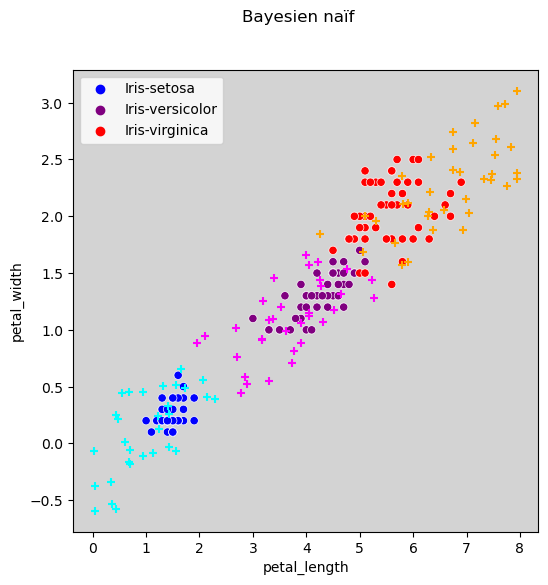

In [136]:
petal_length = np.random.uniform(0., 8., 100)
petal_width = 3./8. * petal_length -0.25
for i in range(len(petal_width)) :
    petal_width[i] += (np.random.random() - 0.5)


IC_setosa = (IC_mu_norm(0.025, m1, s1, 50), IC_mu_norm(0.025, m4, s4, 50))
IC_virginica = (IC_mu_norm(0.025, m2, s2, 50), IC_mu_norm(0.025, m5, s5, 50))
IC_versicolor = (IC_mu_norm(0.025, m3, s3, 50), IC_mu_norm(0.025, m6, s6, 50))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Bayesien naïf")
ax.set_facecolor('lightgray')

sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='type', palette=color_palette, ax=ax)

ax.legend()

colormap = {
    'Iris-setosa': 'cyan',
    'Iris-virginica': 'orange',
    'Iris-versicolor': 'magenta'
    
}
for i in range(100):
    pw = petal_width[i]
    pl = petal_length[i]
    ax.scatter(pl, pw, c=colormap[bayes_naif_iris(pw, pl)], marker='+')

## Optimisation - régression linéaire